<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%204%3A%20Time%20Series%20Analysis/4_2_Smoothing_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**
## Smoothing Methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement

Forecasting electricity production from wind energy is a crucial problem for operations management in wind turbines. Wind energy is strongly correlated with the wind speed. In this case study forecasting algorithms are applied in wind speed prediction 

In [ ]:
#Dataset import
url='https://drive.google.com/file/d/1-ohfTF75ZOxMfgaVx6minLsxsCiUfObD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
#df = pd.read_csv("windspeed.csv")
df.head()

,Unnamed: 0,Date,Hour,Temperature,WindSpeed,Humidity,WindDirection,Pressure
0,0,1/6/2015,0,13.4,0.8,85.0,118.0,1018.0
1,1,1/6/2015,1,12.9,0.6,88.0,121.0,1018.2
2,2,1/6/2015,2,12.6,0.7,88.0,164.0,1018.4
3,3,1/6/2015,3,12.8,0.7,88.0,134.0,1018.5
4,4,1/6/2015,4,14.6,0.6,86.0,31.0,1018.7


Order is not correct newer dates on the top while older dates are in the bottom. First we need to flip the data

In [ ]:
df = df.iloc[::-1,:]
df.reset_index(inplace = True, drop= True)
df.head()

,Unnamed: 0,Date,Hour,Temperature,WindSpeed,Humidity,WindDirection,Pressure
0,43847,31/05/2020,23,17.7,1.9,70.0,238.0,1011.7
1,43846,31/05/2020,22,15.9,1.1,77.0,173.0,1011.7
2,43845,31/05/2020,21,17.0,1.0,75.0,240.0,1011.9
3,43844,31/05/2020,20,17.8,1.7,72.0,244.0,1011.9
4,43843,31/05/2020,19,18.5,0.7,67.0,210.0,1011.8


In [ ]:
wind = df["WindSpeed"]
wind.head()

0    1.9
1    1.1
2    1.0
3    1.7
4    0.7
Name: WindSpeed, dtype: float64

We want to use last day as testing data where as remaining will be used as training data

In [ ]:
wind_train = wind[:-24]
wind_test = wind[-24:]

### Smoothing Methods

#### Exponential Smoothing

Formulation for exponential smoothing is as follows

$$\hat{y}_{t+h} = l_{t+1} $$
$$l_{t+1} = \alpha y_t + (1-\alpha) l_t$$

where: <br>
$l_t$ : is the level at time $t$ <br>
$\hat{y}_{t}$ : is the forecasted value at time $t$<br>
$y_t$ : is the observed value at time $t$<br>
$\alpha$: is the smoothing constant<br>
$h$: forecasting period

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


R2 Score: -0.2663696969231546


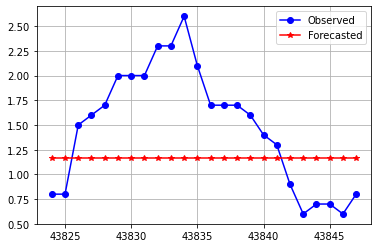

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score
mdl = ExponentialSmoothing(wind_train).fit()
## We are going to predict from first index of the testing data till the last index of the testing data
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("R2 Score:", r2_score(wind_test, ypred))

From the plot we can see that multistep forecasting is not effective with Simple Exponential Smoothing

### Holt's Trend Method

$$\hat{y}_{t+h} = l_{t} + hb_t $$
$$l_{t} = \alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1})$$
$$b_t = \beta (l_{t}-l_{t-1}) + (1-\beta)b_{t-1}$$

where: <br>
$b_t$ : is the trend at time $t$ <br>
$\beta$: is the smoothing parameter for trend

R2 Score: -0.2663694822038909


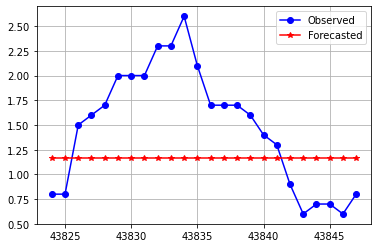

In [ ]:
# We can have multiplicative and additive trend
mdl = ExponentialSmoothing(wind_train, trend = "add").fit()
## We are going to predict from first index of the testing data till the last index of the testing data
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("R2 Score:", r2_score(wind_test, ypred))

### Damped Trend Method

$$\hat{y}_{t+h} = l_{t} + (\phi + \phi^2 + \dotsi+\phi^h )b_t $$
$$l_{t} = \alpha y_t + (1-\alpha) (l_{t-1} + \phi b_{t-1})$$
$$b_t = \beta (l_{t}-l_{t-1}) + (1-\beta)\phi b_{t-1}$$

where: <br>
$\phi$: is the damping parameter 

Since the data above does not include trend, integrating damping makes the model unstable and does not give meaningfull prediction. For illustration purpose we are going to use the portion of data.

# **Smoothing Methods**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


R2 Score: -1.1873470414462308


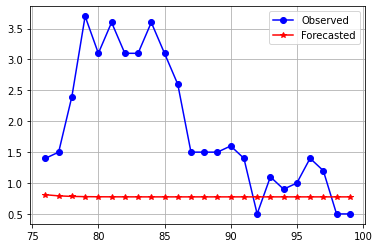

In [ ]:
wind_damp = wind[:100] 
wind_damp_train = wind_damp[:-24]
wind_damp_test = wind_damp[-24:]
mdl = ExponentialSmoothing(wind_damp_train, trend = "add", damped = True).fit()
## We are going to predict from first index of the testing data till the last index of the testing data
ypred = mdl.predict(wind_damp_test.index[0],wind_damp_test.index[-1])

plt.plot(wind_damp_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("R2 Score:", r2_score(wind_damp_test, ypred))

When there is no trend you shouldnt use damping

### Holt Winters' Seasonal Model

$$\hat{y}_{t+h} = l_{t} + hb_t + s_{t+h-m(k+1)}$$
$$l_{t} = \alpha (y_t-s_{t-m}) + (1-\alpha) (l_{t-1} + b_{t-1})$$
$$b_t = \beta (l_{t}-l_{t-1}) + (1-\beta)b_{t-1}$$
$$s_t = γ(y_t-l_{t-1}-b_{t-1})+(1-γ)s_{t-m}$$

where: <br>
$s_t$ : is the seasonal parameter at time $t$ <br>
$\gamma$: is the smoothing parameter for seasonality<br>
$m$: is the seasonal period<br>
$k$: is the integer part of $(h-1)/m$



R2 Score: -1.4963539706149844


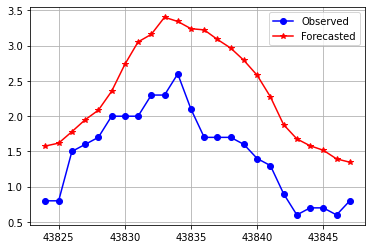

In [ ]:
# We can have multiplicative and additive seasonality. We wil take seasonal period as one day
mdl = ExponentialSmoothing(wind_train, seasonal = "add", seasonal_periods = 24).fit()
## We are going to predict from first index of the testing data till the last index of the testing data
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("R2 Score:", r2_score(wind_test, ypred))